Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
        Unnamed: 0        score
count  9968.000000  9968.000000
mean      7.498495    -0.235642
std       4.610003     0.074733
min       0.000000    -0.592250
25%       3.000000    -0.276289
50%       7.000000    -0.223720
75%      11.000000    -0.184572
max      15.000000    -0.034744
      Unnamed: 0       parcelid prediction     score
6435           4  6710025001900       4300 -0.214042
2783          15  6710023006300        NaN -0.357659
3572           5  6710020001600       6460 -0.205961
8540          13  6710019000200       3350 -0.225248
3937           2  6710013010500       2160 -0.328922
8779          12  6710013008700       6490 -0.147216
5839           0  6710013006700     143030 -0.346990
172           12  6710013006500       5930 -0.164053
2306           2  6710013004400       2610 -0.171417
8971          12  6710013003100       3460 -0.368

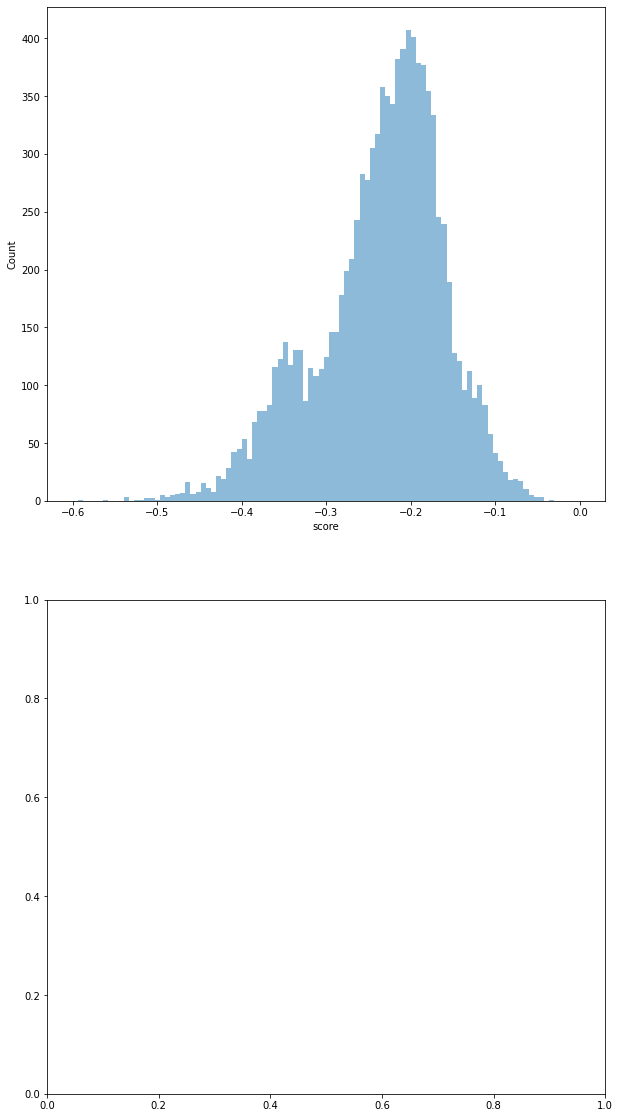

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

# Mount gdrive

from google.colab import drive
content_root = '/content/'
mount_root = '/content/gdrive/'
drive_root = f'{mount_root}MyDrive/'
drive.mount(mount_root)

model_name = "oc-carb-fine-tuning-10k"
# model_name = "carb-oc-fine-tuning-10k-empty"

result = pd.read_csv(f"{drive_root}ErukaTraining/predictions/{model_name}-raw-predictions_0.csv")
filtered = result.copy()
filtered = filtered.astype({"score": "float"})

print(filtered.describe())
print(filtered.sort_values(by="parcelid", ascending=False).head(500).to_string())

bins = np.linspace(-0.6, 0, 100)
# threshold = -0.3

# print(f"Threshold: {threshold}")

# thresholded = filtered[filtered['score'] > threshold]

# print(f"All thresholded: {len(thresholded)}")

fig, axs = pyplot.subplots(2, figsize=(10, 20))
axs[0].hist(filtered['score'], bins, alpha=0.5, label='correct')
axs[0].set(xlabel='score', ylabel='Count')
pyplot.show()
